# 시계열 데이터 다루기

## datetime

In [144]:
from datetime import datetime

import pandas as pd

now = datetime.now()
print(now)

2023-12-05 16:07:49.985019


In [145]:
now1 = datetime.today()
print(now1)

2023-12-05 16:07:49.989666


In [146]:
now1 - now

datetime.timedelta(microseconds=4647)

In [147]:
print(datetime(1970,1,1))
print(datetime(1970,12,12,13,24,44))

1970-01-01 00:00:00
1970-12-12 13:24:44


In [148]:
print(now.year)
print(now.day)
print(now.hour)

2023
5
16


In [149]:
import pandas as pd

rng=pd.date_range("1/1/2000", periods=100, freq="D")
print(rng)

import numpy as np

time_series = pd.Series(np.random.randn(len(rng)), index=rng)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03', '2000-02-04', '2000-02-05',
               '2000-02-06', '2000-02-07', '2000-02-08', '2000-02-09',
               '2000-02-10', '2000-02-11', '2000-02-12', '2000-02-13',
               '2000-02-14', '2000-02-15', '2000-02-16', '2000-02-17',
               '2000-02-18', '2000-02-19', '2000-02-20', '2000-02-21',
               '2000-02-22', '2000-02-23', '2000-02-24', '2000-02-25',
      

In [150]:
# 다운 샘플링
time_series.resample("M", kind="period").mean()

2000-01   -0.276595
2000-02    0.001388
2000-03   -0.205155
2000-04   -0.265159
Freq: M, dtype: float64

In [151]:
time_series.resample("W").mean()

2000-01-02   -0.491940
2000-01-09   -0.603492
2000-01-16    0.321938
2000-01-23   -0.367280
2000-01-30   -0.287469
2000-02-06   -0.410910
2000-02-13    0.189258
2000-02-20    0.002193
2000-02-27    0.217561
2000-03-05   -0.646494
2000-03-12   -0.374010
2000-03-19   -0.207933
2000-03-26    0.090245
2000-04-02    0.085269
2000-04-09   -0.336957
Freq: W-SUN, dtype: float64

In [152]:
rng=pd.date_range("1/1/2000", periods=12, freq="T")
ts=pd.Series(np.arange(12), index=rng)
print(ts)
ts.resample("5min").sum()

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32


2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [153]:
# 5분 단위 다운 ohlc 샘플링
ts.resample("5min").ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [154]:
ebola=pd.read_csv("../contents/country_timeseries.csv")
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [155]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [156]:
pd.to_datetime(ebola["Date"])

0     2015-01-05
1     2015-01-04
2     2015-01-03
3     2015-01-02
4     2014-12-31
         ...    
117   2014-03-27
118   2014-03-26
119   2014-03-25
120   2014-03-24
121   2014-03-22
Name: Date, Length: 122, dtype: datetime64[ns]

In [157]:
ebola["date_dt"]=pd.to_datetime(ebola["Date"])
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,date_dt
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,2015-01-05
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,2015-01-04
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,2015-01-03
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-02
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN,2014-12-31


In [158]:
test_df1["date1"].dt.year

0    2015
1    2015
2    2015
Name: date1, dtype: int32

In [159]:
#문자열을 datetime으로 변환시 순서 지정
test_df1=pd.DataFrame({"order_day":[ "01/01/15", "02/01/15", "03/01/15"]})
test_df1["date1"]=pd.to_datetime(test_df1["order_day"], format="%d/%m/%y")
test_df1["date2"]=pd.to_datetime(test_df1["order_day"], format="%m/%d/%y")
test_df1["date3"]=pd.to_datetime(test_df1["order_day"], format="%y/%m/%d")
test_df1

,order_day,date1,date2,date3
0,01/01/15,2015-01-01,2015-01-01,2001-01-15
1,02/01/15,2015-01-02,2015-02-01,2002-01-15
2,03/01/15,2015-01-03,2015-03-01,2003-01-15


In [160]:
test_df1["date1"].dt.year

0    2015
1    2015
2    2015
Name: date1, dtype: int32

In [161]:
data=ebola.iloc[:, [0,1,2,3,4,5,6,7,8, 9, 18]]
data["month"]=data["date_dt"].dt.month
data

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25956\1179549075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["month"]=data["date_dt"].dt.month


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,date_dt,month
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,2015-01-05,1
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,2015-01-04,1
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,2015-01-03,1
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-02,1
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,2014-12-31,12
...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,2014-03-27,3
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-26,3
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-25,3
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-24,3


<Axes: xlabel='month'>

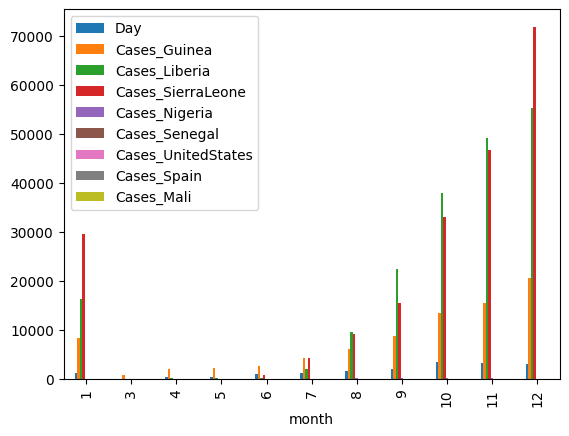

In [162]:
data.groupby("month").sum(numeric_only=True).plot.bar()

In [163]:
data.set_index(data["date_dt"]	)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,date_dt,month
date_dt,,,,,,,,,,,,
2015-01-05,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,2015-01-05,1
2015-01-04,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,2015-01-04,1
2015-01-03,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,2015-01-03,1
2015-01-02,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-02,1
2014-12-31,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,2014-12-31,12
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-27,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,2014-03-27,3
2014-03-26,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-26,3
2014-03-25,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-25,3


# 파산한 은행 수 구하기

In [164]:
banklist = pd.read_csv("../contents/banklist.csv")
banklist.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


In [165]:
banklist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB


In [166]:
banklist = pd.read_csv("../contents/banklist.csv", parse_dates=[5,6])
banklist.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25956\190995461.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banklist = pd.read_csv("../contents/banklist.csv", parse_dates=[5,6])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_25956\190995461.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banklist = pd.read_csv("../contents/banklist.csv", parse_dates=[5,6])


,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05


In [167]:
banklist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB


In [168]:
banklist["Closing Date"]

0     2017-12-15
1     2017-10-13
2     2017-05-26
3     2017-05-05
4     2017-04-28
         ...    
550   2001-07-27
551   2001-05-03
552   2001-02-02
553   2000-12-14
554   2000-10-13
Name: Closing Date, Length: 555, dtype: datetime64[ns]

In [169]:
print(banklist["Closing Date"].max() - banklist["Closing Date"].min())

6272 days 00:00:00


In [170]:
closed_year=banklist["Closing Date"].dt.year
closed_quarter=banklist["Closing Date"].dt.quarter

banklist["closed_year"]=closed_year
banklist["closed_quarter"]=closed_quarter
banklist.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closed_year,closed_quarter
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20,2017,4
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20,2017,4
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2017,2
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2017,2
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05,2017,2


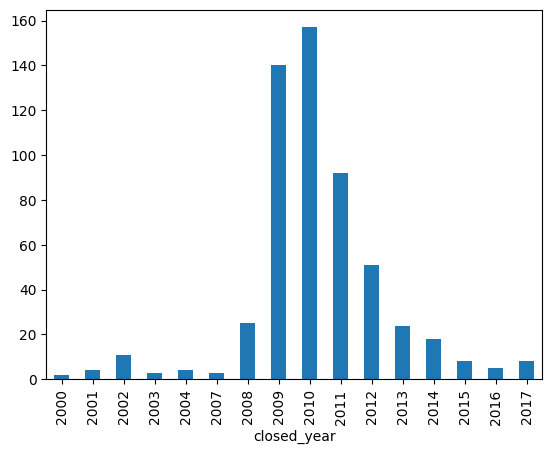

closed_year,2000,2001,2002,2003,2004,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
closed_quarter,,,,,,,,,,,,,,,,
1,0,1,6,1,3,1,2,21,41,26,16,4,5,4,1,3
2,0,1,2,1,1,0,2,24,45,22,15,12,7,1,2,3
3,0,2,1,0,0,1,9,50,41,26,12,6,2,1,2,0
4,2,0,2,1,0,1,12,45,30,18,8,2,4,2,0,2


<Axes: xlabel='closed_year'>

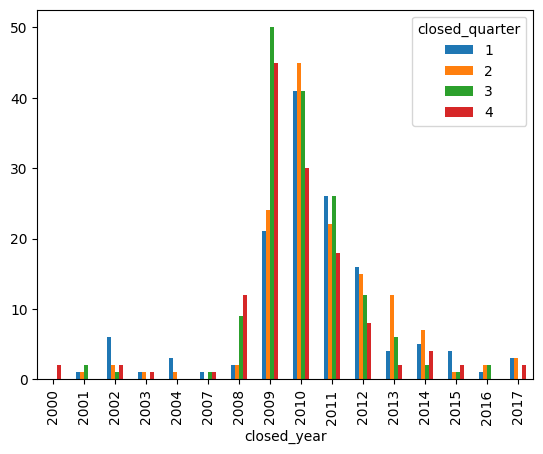

In [171]:
from matplotlib import pyplot as plt

# banklist[["Bank Name", "closed_year"]].groupby("closed_year").count().plot.bar()
banklist.groupby(banklist["closed_year"]).size().plot.bar()
plt.show()
display(banklist.groupby(["closed_year", "closed_quarter"]).size().unstack(fill_value=0).T)
banklist.groupby(["closed_year", "closed_quarter"]).size().unstack().plot.bar()

# 테슬라 주식으로 시간 계산하기

In [172]:
tesla = pd.read_csv("../contents/tesla_stock_quandl.csv")
tesla.head()

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
0,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0
1,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
2,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
3,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
4,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0


In [173]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        219 non-null    object 
 1   Open        219 non-null    float64
 2   High        219 non-null    float64
 3   Low         219 non-null    float64
 4   Close       219 non-null    float64
 5   Volume      219 non-null    float64
 6   ExDividend  219 non-null    float64
 7   SplitRatio  219 non-null    float64
 8   AdjOpen     219 non-null    float64
 9   AdjHigh     219 non-null    float64
 10  AdjLow      219 non-null    float64
 11  AdjClose    219 non-null    float64
 12  AdjVolume   219 non-null    float64
dtypes: float64(12), object(1)
memory usage: 22.4+ KB


In [174]:
tesla['Date'] = pd.to_datetime(tesla['Date'])
tesla[(tesla["Date"].dt.year==2017)&(tesla["Date"].dt.month==6)]

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
184,2017-06-30,363.710,366.7674,359.6187,361.61,5759458.0,0.0,1.0,363.710,366.7674,359.6187,361.61,5759458.0
185,2017-06-29,370.610,371.0000,354.1000,360.75,8180408.0,0.0,1.0,370.610,371.0000,354.1000,360.75,8180408.0
186,2017-06-28,366.680,371.7400,362.5200,371.24,6245040.0,0.0,1.0,366.680,371.7400,362.5200,371.24,6245040.0
187,2017-06-27,376.400,376.4000,362.0200,362.37,6884529.0,0.0,1.0,376.400,376.4000,362.0200,362.37,6884529.0
188,2017-06-26,386.690,386.9500,373.1000,377.49,6575285.0,0.0,1.0,386.690,386.9500,373.1000,377.49,6575285.0
189,2017-06-23,382.450,386.9900,379.3450,383.45,6176578.0,0.0,1.0,382.450,386.9900,379.3450,383.45,6176578.0
190,2017-06-22,377.990,385.0000,373.5700,382.61,7485677.0,0.0,1.0,377.990,385.0000,373.5700,382.61,7485677.0
191,2017-06-21,374.350,376.9900,368.0200,376.40,4900356.0,0.0,1.0,374.350,376.9900,368.0200,376.40,4900356.0
192,2017-06-20,376.670,378.8800,369.7300,372.24,7396357.0,0.0,1.0,376.670,378.8800,369.7300,372.24,7396357.0
193,2017-06-19,375.000,376.7000,367.8000,369.80,6392331.0,0.0,1.0,375.000,376.7000,367.8000,369.80,6392331.0


In [175]:
tesla.index=tesla["Date"]
tesla

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,,
2018-03-27,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0
2018-03-26,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
2018-03-23,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
2018-03-22,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
2018-03-21,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-18,2017-05-18,307.00,313.94,305.31,313.06,5590416.0,0.0,1.0,307.00,313.94,305.31,313.06,5590416.0
2017-05-17,2017-05-17,314.39,314.63,305.50,306.11,6675795.0,0.0,1.0,314.39,314.63,305.50,306.11,6675795.0
2017-05-16,2017-05-16,317.59,320.06,315.14,317.01,4121619.0,0.0,1.0,317.59,320.06,315.14,317.01,4121619.0


In [176]:
print(tesla.index.min())
print(tesla.index.max())

2017-05-12 00:00:00
2018-03-27 00:00:00


In [177]:
# 시작 부터 지난 시간 계산
tesla["time"]=tesla["Date"]-tesla["Date"].min()
tesla

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,time
Date,,,,,,,,,,,,,,
2018-03-27,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0,319 days
2018-03-26,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0,318 days
2018-03-23,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0,315 days
2018-03-22,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0,314 days
2018-03-21,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0,313 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-18,2017-05-18,307.00,313.94,305.31,313.06,5590416.0,0.0,1.0,307.00,313.94,305.31,313.06,5590416.0,6 days
2017-05-17,2017-05-17,314.39,314.63,305.50,306.11,6675795.0,0.0,1.0,314.39,314.63,305.50,306.11,6675795.0,5 days
2017-05-16,2017-05-16,317.59,320.06,315.14,317.01,4121619.0,0.0,1.0,317.59,320.06,315.14,317.01,4121619.0,4 days


In [179]:
tesla.index=tesla["time"]
tesla["5days":]

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,time
time,,,,,,,,,,,,,,
5 days,2017-05-17,314.39,314.63,305.50,306.11,6675795.0,0.0,1.0,314.39,314.63,305.50,306.11,6675795.0,5 days
4 days,2017-05-16,317.59,320.06,315.14,317.01,4121619.0,0.0,1.0,317.59,320.06,315.14,317.01,4121619.0,4 days
3 days,2017-05-15,318.38,320.20,312.53,315.88,7568594.0,0.0,1.0,318.38,320.20,312.53,315.88,7568594.0,3 days
0 days,2017-05-12,325.48,327.00,321.53,324.81,4114166.0,0.0,1.0,325.48,327.00,321.53,324.81,4114166.0,0 days


# 이동창 평균

In [188]:
stock=pd.read_csv("../contents/stock_px.csv", parse_dates=[0], index_col=0)[["AAPL", "IBM", "MSFT"]]
stock.head()

,AAPL,IBM,MSFT
1990-02-01,7.86,16.79,0.51
1990-02-02,8.00,16.89,0.51
1990-02-05,8.18,17.32,0.51
1990-02-06,8.12,17.56,0.51
1990-02-07,7.77,17.93,0.51


In [189]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    5472 non-null   float64
 1   IBM     5472 non-null   float64
 2   MSFT    5472 non-null   float64
dtypes: float64(3)
memory usage: 171.0 KB


<Axes: >

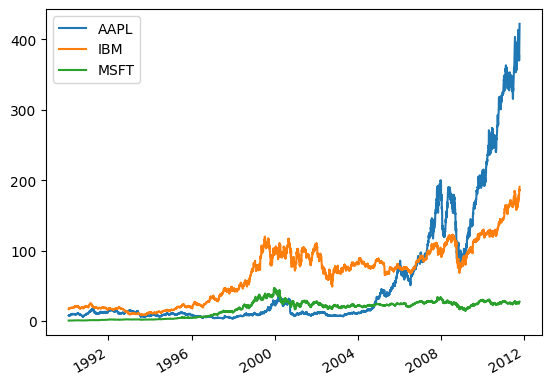

In [190]:
stock.plot()

In [193]:
stock = stock.resample("B").ffill()
stock

,AAPL,IBM,MSFT
1990-02-01,7.86,16.79,0.51
1990-02-02,8.00,16.89,0.51
1990-02-05,8.18,17.32,0.51
1990-02-06,8.12,17.56,0.51
1990-02-07,7.77,17.93,0.51
...,...,...,...
2011-10-10,388.81,186.62,26.94
2011-10-11,400.29,185.00,27.00
2011-10-12,402.19,186.12,26.96
2011-10-13,408.43,186.82,27.18


<Axes: >

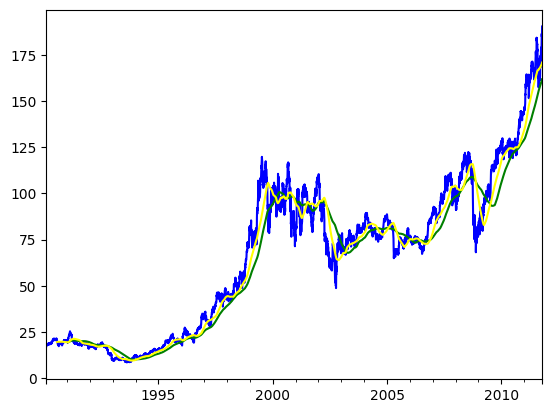

In [195]:
stock.IBM.plot(color="blue")
stock.IBM.rolling(window=250, center=False).mean().plot(color="green")
stock.IBM.rolling(window=125, center=False).mean().plot(color="yellow")